## Electricity Price Prediction - Regression

As the demand for electricity continues to grow amidst increasing urbanization and technological advancements, accurately predicting electricity prices has become essential for energy producers, consumers, and policymakers. Understanding the factors that influence electricity prices can lead to better decision-making, efficient resource allocation, and improved sustainability in energy systems.

This project focuses on developing predictive models for electricity prices based on a comprehensive dataset that includes various features such as date and time information, weather conditions, and energy demand. 
Key columns in the dataset include:
* DateTime: The timestamp for each data entry, essential for analyzing temporal trends and seasonality in electricity prices.
* Holiday: A binary indicator indicating whether the day is a holiday, which can significantly affect electricity consumption patterns.
* HolidayFlag: Similar to the Holiday column, this flag provides additional context for holiday effects on demand and pricing.
* DayOfWeek: The day of the week, which influences consumption patterns (e.g., weekdays vs. weekends).
* WeekOfYear: The week number in the year, helping to capture seasonal trends and variations in electricity use.
* Day, Month, Year: Basic date components that allow for further temporal analysis and feature engineering.
* PeriodOfDay: The time of day, which is crucial for understanding peak demand periods and corresponding price fluctuations.
* ForecastWindProduction: The predicted amount of wind energy generation, impacting overall supply and, consequently, electricity prices.
* SystemLoadEA: The estimated load on the electricity system, which directly correlates with demand and pricing.
* SMPEA: The spot market price for electricity in the EA region, providing a benchmark for price prediction.
* ORKTemperature: The temperature in the ORK area, as weather conditions can influence electricity consumption patterns.
* ORKWindspeed: Wind speed in the ORK area, which affects renewable energy production and supply dynamics.
* CO2Intensity: The carbon intensity of electricity generation, relevant for understanding the environmental impact and regulatory considerations.
* ActualWindProduction: The actual amount of wind energy generated, which can differ from forecasts and influence overall supply.
* SystemLoadEP2: The estimated load on the electricity system in the EP2 region, providing additional context for demand management.
* SMPEP2: The spot market price for electricity in the EP2 region, allowing for regional price comparisons.

The primary objectives of this project are:
* Data Exploration: To analyze historical electricity prices and their relationship with various influencing factors, identifying patterns and anomalies.
* Model Development: To build and evaluate multiple regression models and machine learning algorithms to predict electricity prices based on the identified features.
* Performance Evaluation: To assess model accuracy using metrics such as R² score, mean absolute error, and root mean squared error, ensuring reliable predictions.


<img src='epp.jpg' width=450 >

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv('electricity.csv')
#Reading our file.

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
df.shape

(38014, 18)

In [6]:
df.drop('Holiday', axis=1,inplace=True)

In [7]:
#df['DateTime']=pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')
df.drop('DateTime',axis=1,inplace=True)

In [8]:
cols_to_convert = ['ForecastWindProduction', 'SystemLoadEA', 'SMPEA','ORKTemperature','ORKWindspeed',
                   'CO2Intensity','ActualWindProduction','SystemLoadEP2','SMPEP2']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
#There are some that appear as objects even though they are numeric columns. We convert them to numeric.

In [9]:
df.head()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [10]:
df.isnull().sum()

HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
count,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000
mean,0.037578,2.998355,28.044584,15.707181,6.886789,2012.386577,23.508651,542.871513,4020.753657,62.747428,9.628443,19.209721,479.519761,519.814951,3787.560062,64.181344
std,0.190175,1.998845,15.552428,8.804424,3.566915,0.623780,13.854822,413.725304,860.148265,32.300069,4.439757,9.569069,85.170896,377.879680,842.544909,35.432265
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.680000,2183.940000,0.000000,-4.000000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,0.000000,1.000000,14.000000,8.000000,4.000000,2012.000000,12.000000,188.927500,3281.780000,45.540000,6.000000,13.000000,421.275000,198.000000,3060.215000,45.800000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000,440.645000,4105.530000,55.230000,9.000000,18.500000,480.350000,444.000000,3867.220000,55.560000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,36.000000,837.182500,4638.982500,70.320000,13.000000,24.100000,537.540000,792.000000,4427.822500,72.120000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1680.000000,6492.910000,587.580000,25.000000,75.900000,842.880000,1769.000000,6309.750000,1000.000000


In [13]:
df.corr(numeric_only=True)

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
HolidayFlag,1.000000,-0.132555,-0.025538,0.030917,0.012688,-0.010826,0.001025,0.073655,-0.053758,0.003094,-0.096742,0.062964,-0.054537,0.065255,-0.077773,-0.001838
DayOfWeek,-0.132555,1.000000,0.008881,-0.004845,0.004288,0.000978,0.000328,-0.035666,-0.184712,-0.077541,-0.015850,-0.053902,0.029910,-0.032427,-0.190931,-0.069625
WeekOfYear,-0.025538,0.008881,1.000000,0.056717,0.970971,-0.234029,-0.000263,0.044062,-0.027475,-0.017929,0.155844,-0.028194,-0.093605,0.062363,-0.039600,-0.015814
Day,0.030917,-0.004845,0.056717,1.000000,0.004558,0.001404,0.000059,0.070681,-0.007528,-0.017830,0.014871,0.086643,-0.082226,0.060629,-0.026060,-0.012801
Month,0.012688,0.004288,0.970971,0.004558,1.000000,-0.233672,-0.000189,0.047053,-0.032178,-0.017667,0.150300,-0.028385,-0.104434,0.064416,-0.041150,-0.014918
Year,-0.010826,0.000978,-0.234029,0.001404,-0.233672,1.000000,0.000176,-0.045914,-0.081615,0.045147,0.079474,-0.013096,-0.192302,-0.064141,-0.059444,0.045456
PeriodOfDay,0.001025,0.000328,-0.000263,0.000059,-0.000189,0.000176,1.000000,0.034860,0.609273,0.356120,0.137944,0.088345,-0.177251,0.061086,0.594772,0.323490
ForecastWindProduction,0.073655,-0.035666,0.044062,0.070681,0.047053,-0.045914,0.034860,1.000000,0.177769,-0.046090,-0.172912,0.714234,-0.652286,0.953812,0.034687,-0.079639
SystemLoadEA,-0.053758,-0.184712,-0.027475,-0.007528,-0.032178,-0.081615,0.609273,0.177769,1.000000,0.532210,-0.086961,0.182608,-0.209947,0.200531,0.972738,0.491096
SMPEA,0.003094,-0.077541,-0.017929,-0.017830,-0.017667,0.045147,0.356120,-0.046090,0.532210,1.000000,0.018898,0.014079,-0.086420,-0.032218,0.534822,0.618158


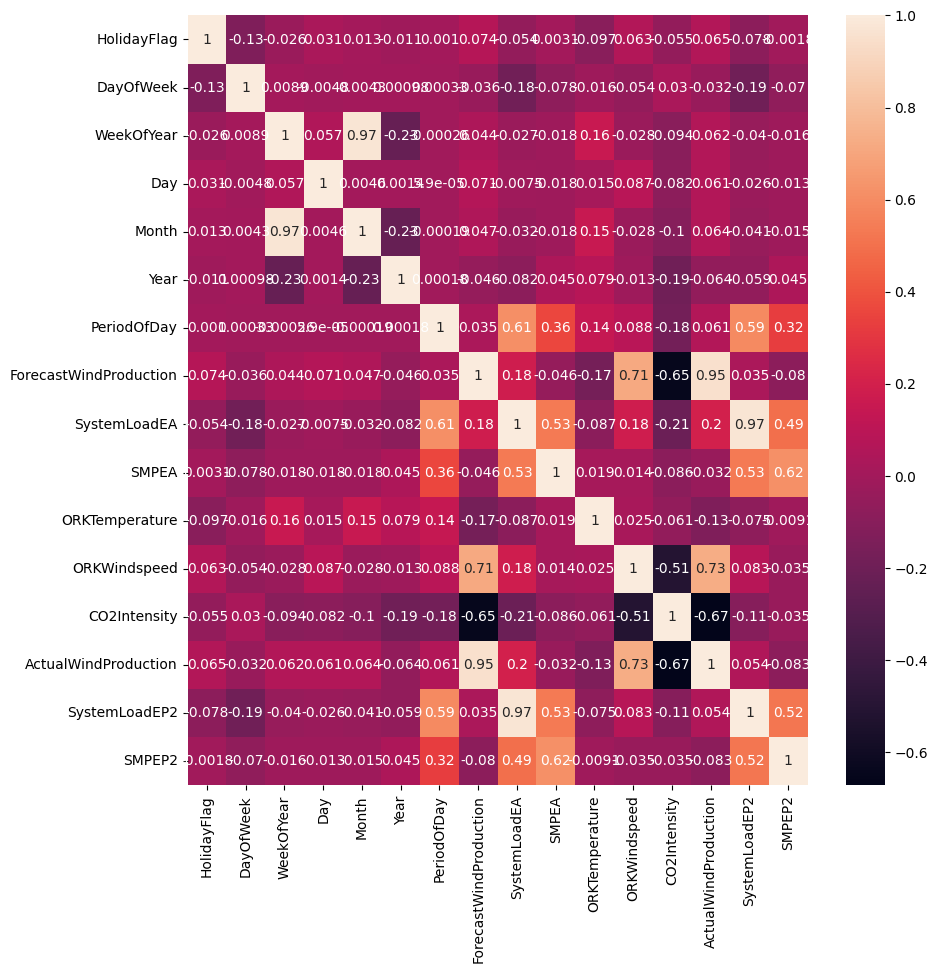

In [14]:
plt.figure(figsize=(10,10));
sns.heatmap(df.corr(numeric_only=True),annot=True);

## Data Visualization

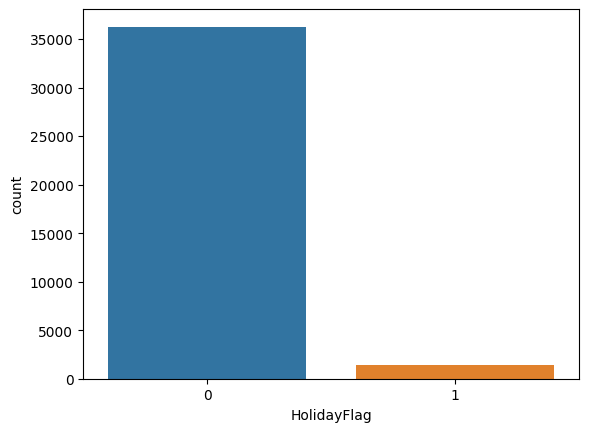

In [15]:
sns.countplot(x=df['HolidayFlag']);

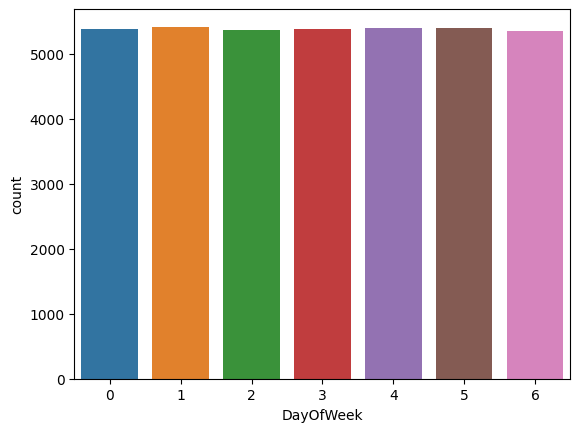

In [16]:
sns.countplot(x=df['DayOfWeek']);

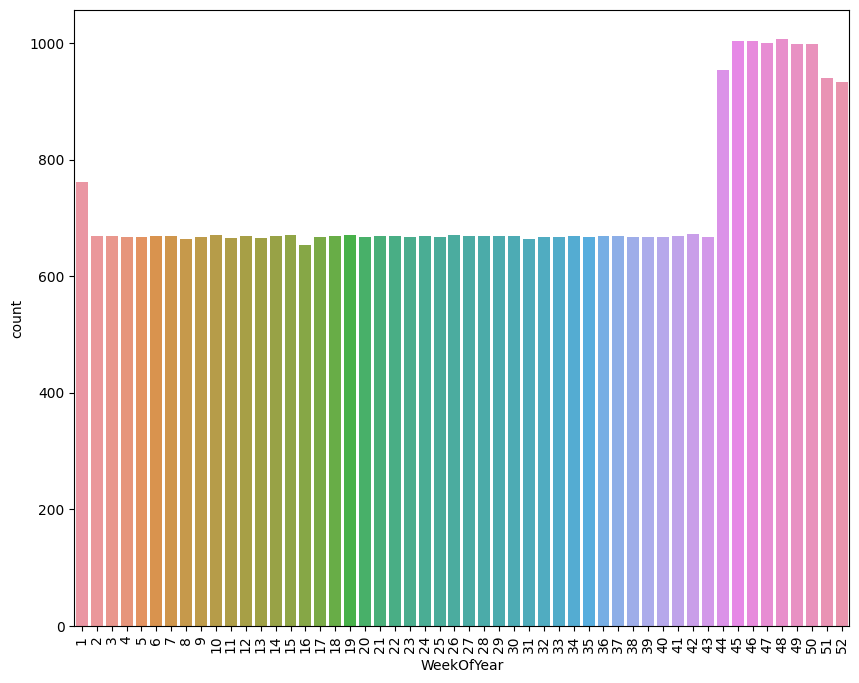

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['WeekOfYear'])
plt.xticks(rotation=90);

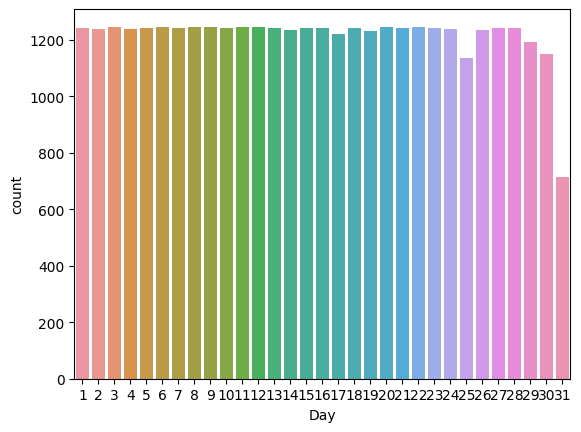

In [18]:
sns.countplot(x=df['Day']);

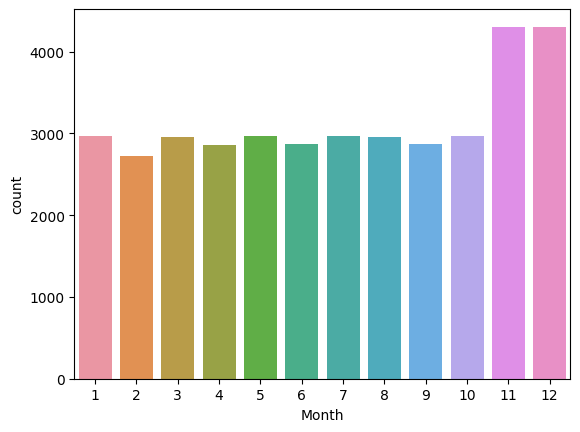

In [19]:
sns.countplot(x=df['Month']);

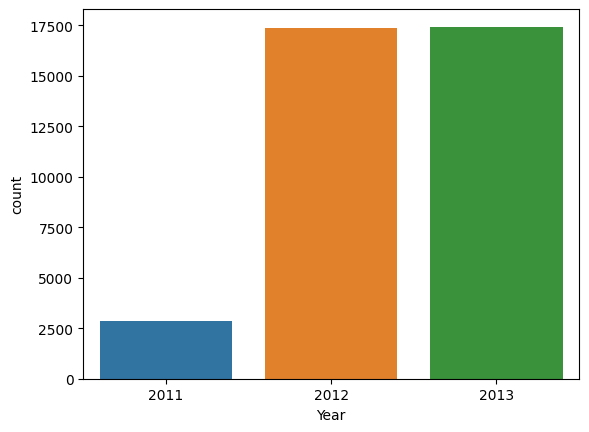

In [20]:
sns.countplot(x=df['Year']);

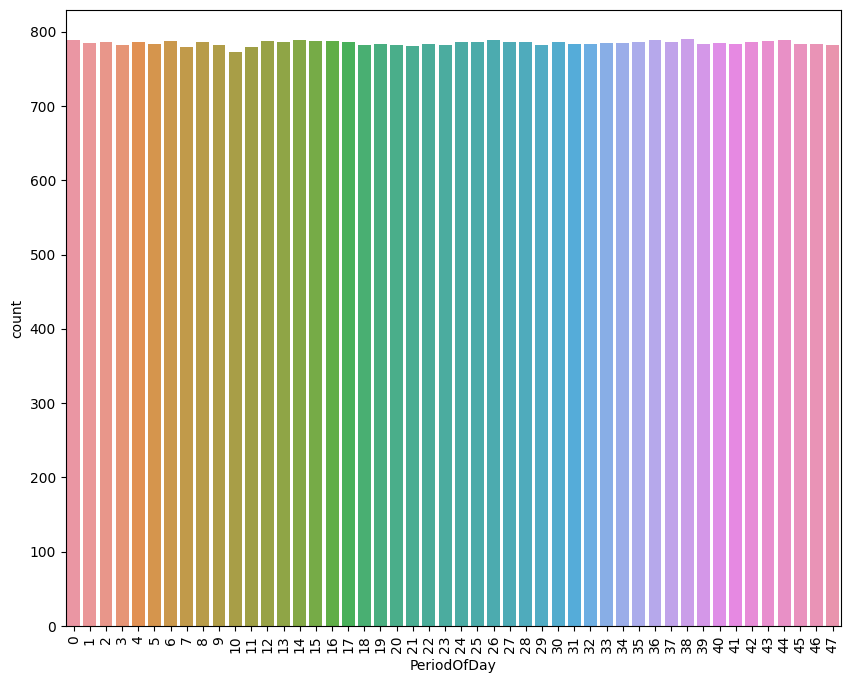

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['PeriodOfDay'])
plt.xticks(rotation=90);

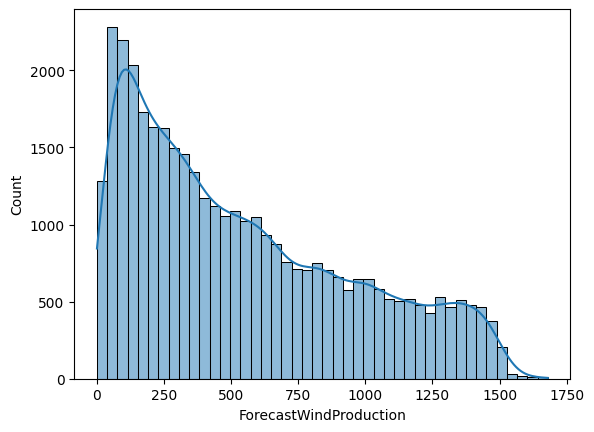

In [22]:
sns.histplot(x=df['ForecastWindProduction'],kde=True);

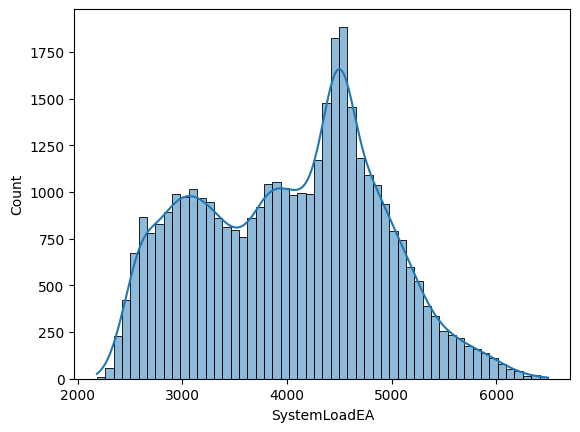

In [23]:
sns.histplot(x=df['SystemLoadEA'],kde=True);

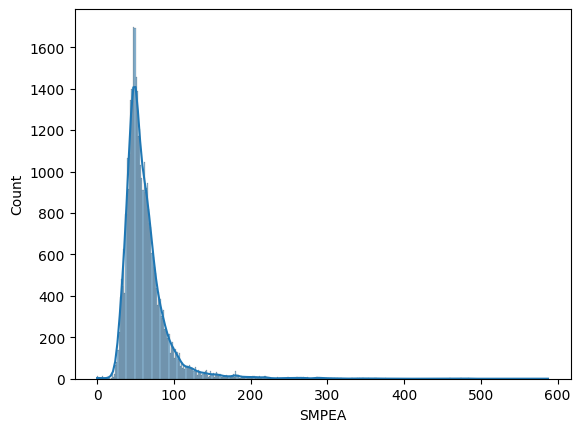

In [24]:
sns.histplot(x=df['SMPEA'],kde=True);

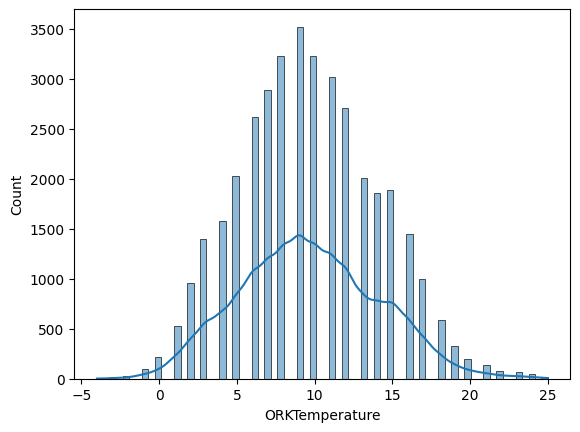

In [25]:
sns.histplot(x=df['ORKTemperature'],kde=True);

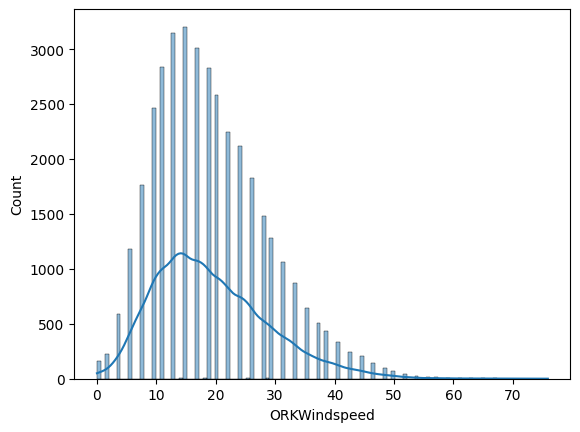

In [26]:
sns.histplot(x=df['ORKWindspeed'],kde=True);

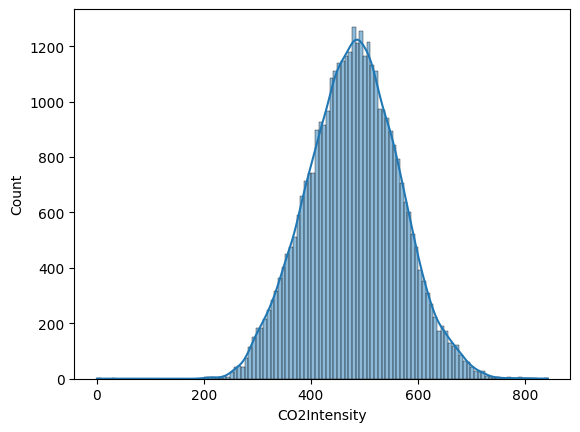

In [27]:
sns.histplot(x=df['CO2Intensity'],kde=True);

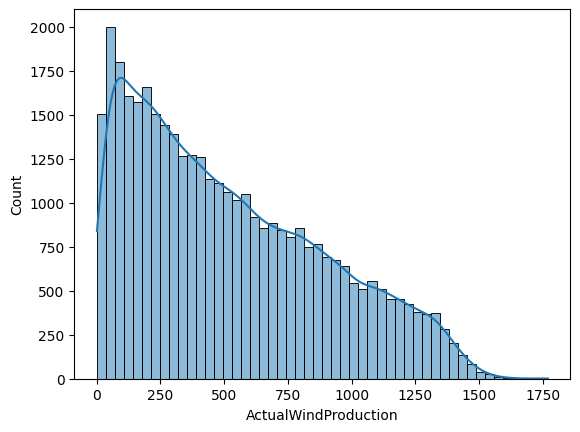

In [28]:
sns.histplot(x=df['ActualWindProduction'],kde=True);

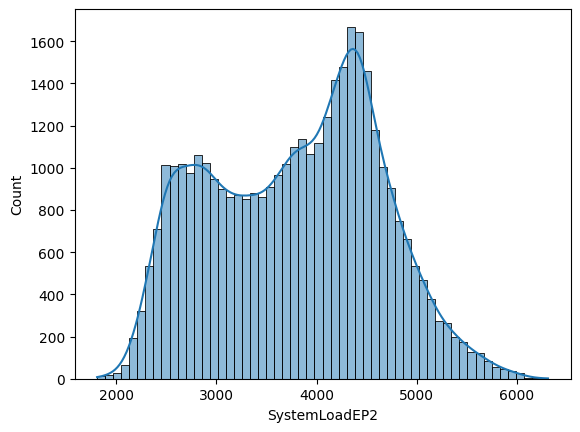

In [29]:
sns.histplot(x=df['SystemLoadEP2'],kde=True);

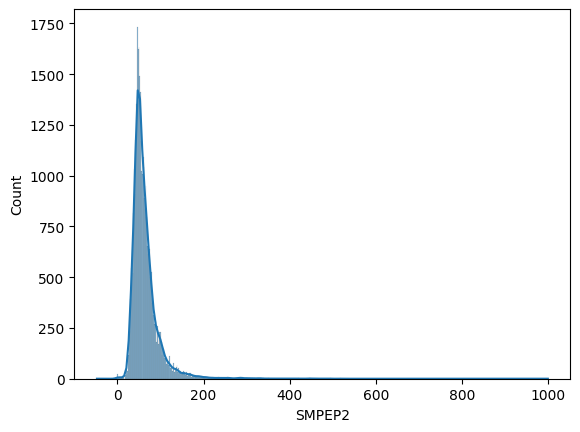

In [30]:
sns.histplot(x=df['SMPEP2'],kde=True);

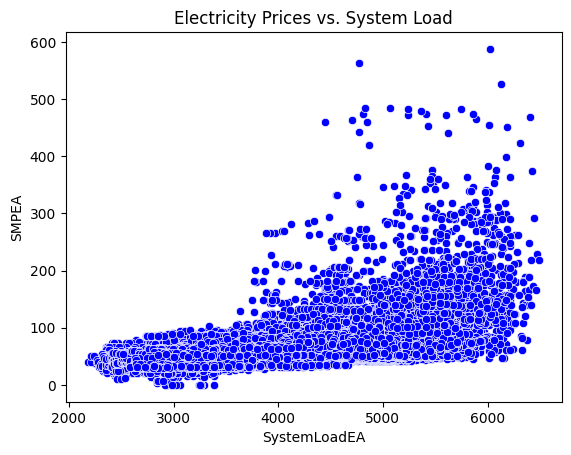

In [31]:
sns.scatterplot(x=df['SystemLoadEA'], y=df['SMPEA'],color='blue')
plt.title('Electricity Prices vs. System Load');

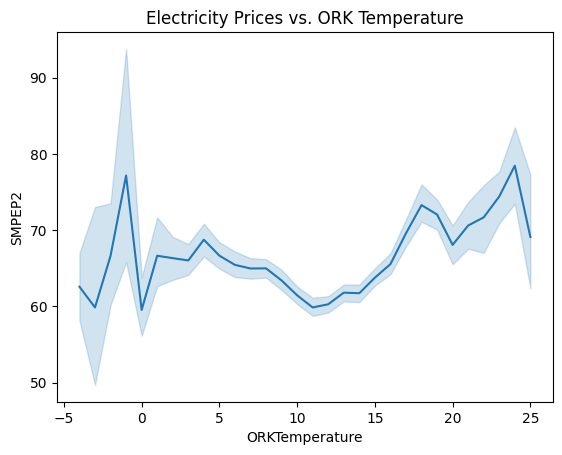

In [33]:
sns.lineplot(x=df['ORKTemperature'], y=df['SMPEP2'])
plt.title('Electricity Prices vs. ORK Temperature');

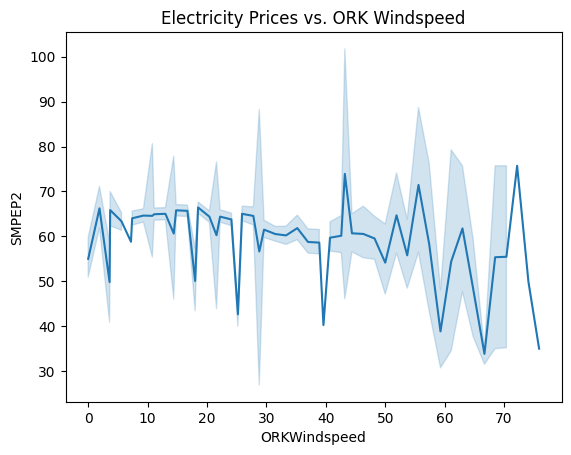

In [34]:
sns.lineplot(x=df['ORKWindspeed'], y=df['SMPEP2'])
plt.title('Electricity Prices vs. ORK Windspeed');

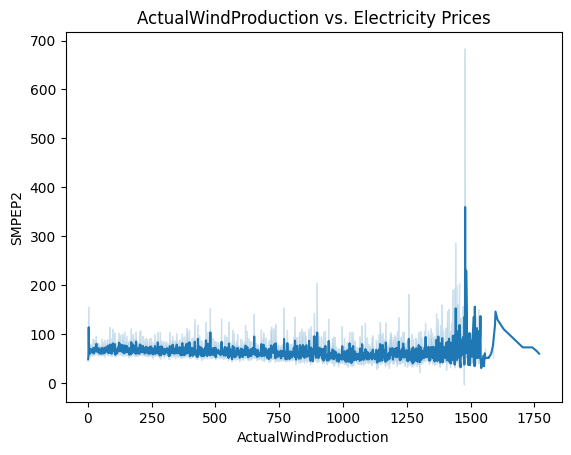

In [35]:
sns.lineplot(x=df['ActualWindProduction'], y=df['SMPEP2'])
plt.title('ActualWindProduction vs. Electricity Prices');

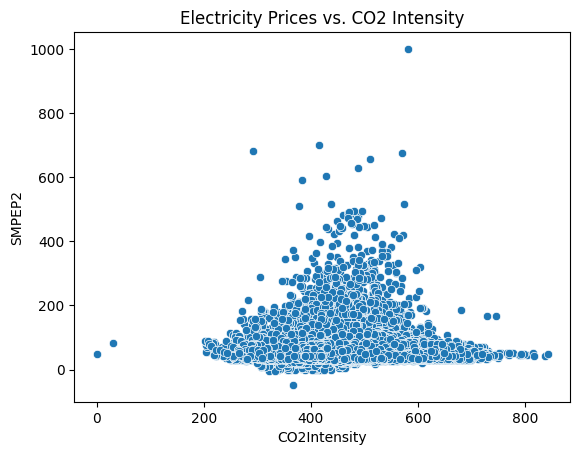

In [36]:
sns.scatterplot(x=df['CO2Intensity'], y=df['SMPEP2'])
plt.title('Electricity Prices vs. CO2 Intensity');

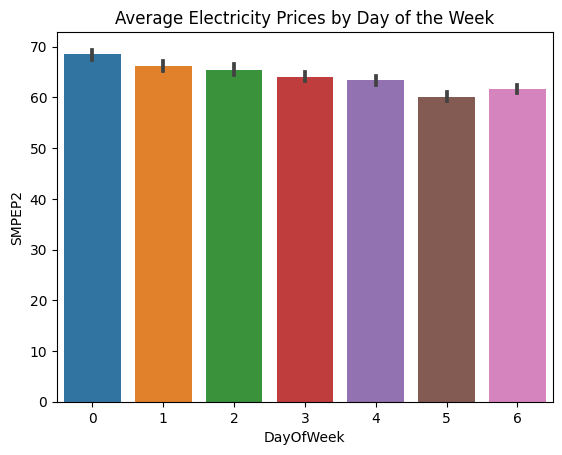

In [37]:
sns.barplot(x=df['DayOfWeek'], y=df['SMPEP2'])
plt.title('Average Electricity Prices by Day of the Week');

## Modelling

In [15]:
x=df.drop('SMPEP2', axis=1)
y=df[['SMPEP2']]

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [17]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
pred=lr.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2_score=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2_score)

Root Mean Squared Error: 27.80424817881582
R2 Score: 0.4048126617651482


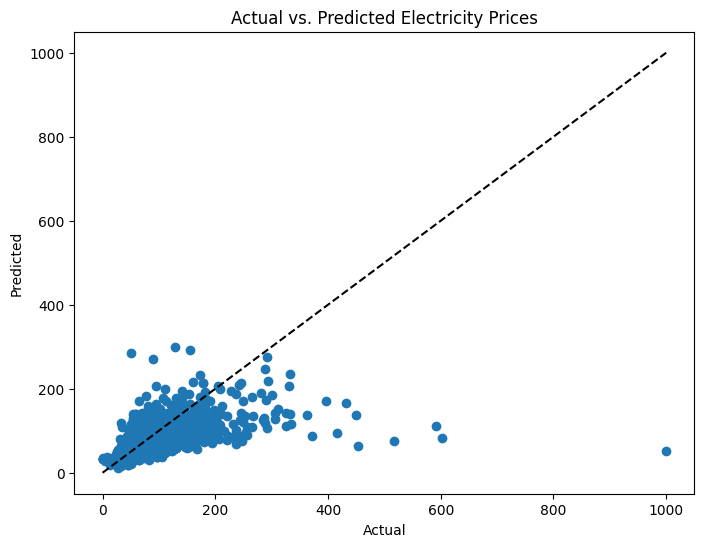

In [18]:
y_pred=model.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Electricity Prices')
plt.show()

In [19]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':lr.coef_[0]})

In [20]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

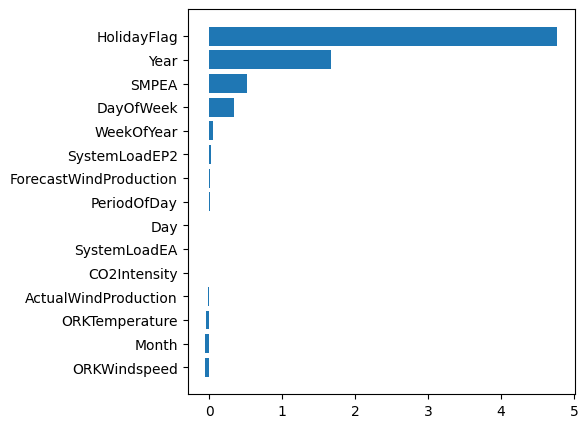

In [21]:
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [22]:
residuals=y_test-pred

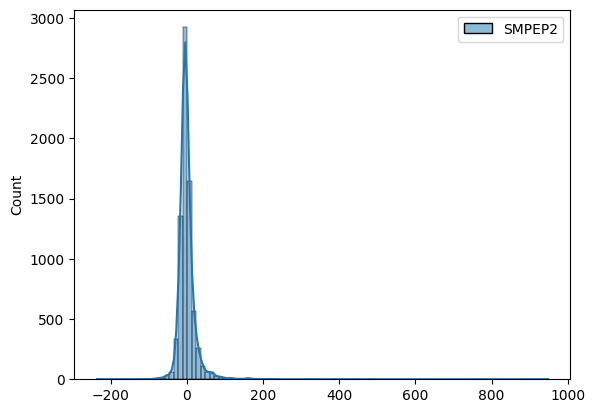

In [23]:
sns.histplot(residuals, kde=True,bins=100);

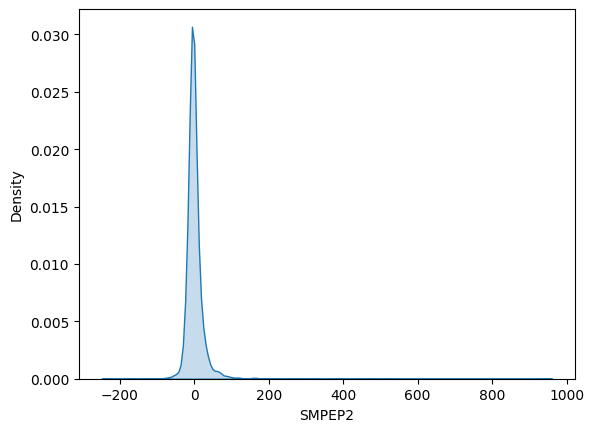

In [24]:
sns.kdeplot(x=residuals['SMPEP2'], fill=True);

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [46]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,5.451776e-01,2.430554e+01,1.062853e+01
Gradient Boosting,4.736978e-01,2.614580e+01,1.281623e+01
mlp_regressor,4.115570e-01,2.764627e+01,1.339540e+01
Linear,4.048127e-01,2.780425e+01,1.403342e+01
Ridge,4.048122e-01,2.780426e+01,1.403340e+01
ElasticNet,4.025697e-01,2.785659e+01,1.405922e+01
Lasso,4.022746e-01,2.786347e+01,1.405407e+01
AdaBoost,3.768208e-01,2.845056e+01,1.417740e+01
Extra Tree,2.711213e-01,3.076890e+01,1.067640e+01
Decision Tree,2.665138e-01,3.086599e+01,1.071511e+01


## AutoML with PyCaret

In [47]:
from pycaret.regression import*

In [48]:
setup(data=df, target='SMPEP2')

,Description,Value
0,Session id,2066
1,Target,SMPEP2
2,Target type,Regression
3,Original data shape,"(37682, 16)"
4,Transformed data shape,"(37682, 16)"
5,Transformed train set shape,"(26377, 16)"
6,Transformed test set shape,"(11305, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [49]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.3926,507.1805,22.3888,0.6082,0.1969,0.1498,1.9880
rf,Random Forest Regressor,9.5807,539.5490,23.1115,0.5824,0.2138,0.1690,5.5290
xgboost,Extreme Gradient Boosting,11.4307,587.4716,24.1522,0.5439,0.2394,0.1996,0.1400
lightgbm,Light Gradient Boosting Machine,12.1994,588.6672,24.1848,0.5426,0.2532,0.2207,0.3600
gbr,Gradient Boosting Regressor,13.2061,636.0640,25.1348,0.5062,0.2681,0.2389,1.3630
lr,Linear Regression,14.5315,733.8709,27.0143,0.4306,0.2863,0.2485,0.5200
ridge,Ridge Regression,14.5315,733.8709,27.0143,0.4306,0.2863,0.2485,0.0210
br,Bayesian Ridge,14.5264,734.9822,27.0351,0.4297,0.2865,0.2482,0.0250
en,Elastic Net,14.5271,735.5375,27.0452,0.4293,0.2866,0.2481,0.0820
llar,Lasso Least Angle Regression,14.5208,735.7283,27.0487,0.4291,0.2866,0.2479,0.0210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Deep Learning

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model=Sequential()
model.add(Dense(120,activation='relu'))  
model.add(Dense(80,activation='relu')) 
model.add(Dense(64,activation='relu')) 
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [52]:
history=model.fit(x,y,epochs=3500, batch_size=150, validation_split=.20,verbose=0)

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,331 (227.86 KB)

 Trainable params: 19,443 (75.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,888 (151.91 KB)

In [54]:
tahmin=model.predict(x_test)

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [55]:
r2_score(y_test,tahmin)

0.6258390396722897

In [56]:
mean_squared_error(y_test,tahmin)**.5

22.045174979257997

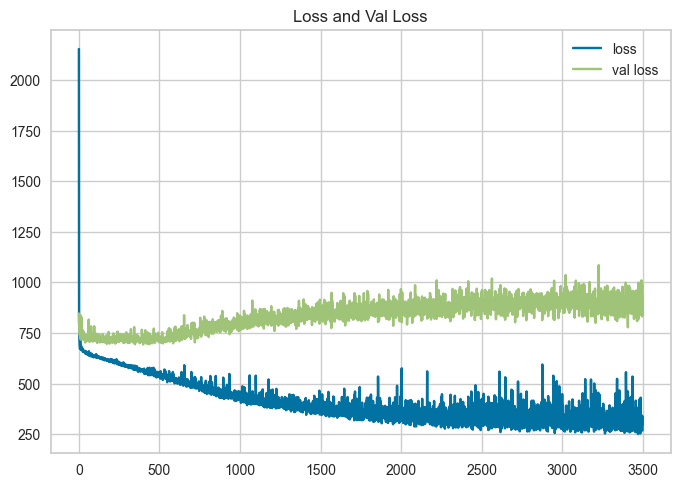

In [57]:
plt.plot(history.history['loss'],label='loss') 
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss and Val Loss')
plt.legend();

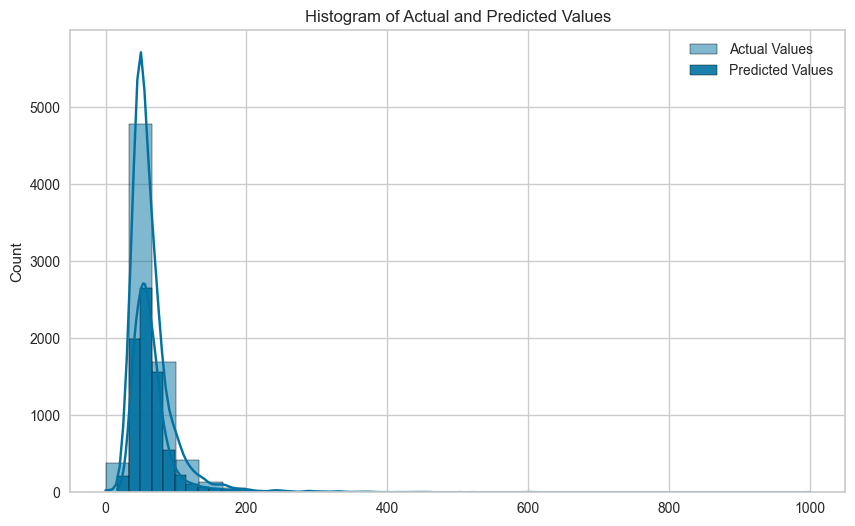

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True,label='Actual Values', alpha=0.5, bins=30)
sns.histplot(tahmin, kde=True,label='Predicted Values', alpha=0.9, bins=30)
plt.title('Histogram of Actual and Predicted Values')
plt.legend();

## Short Summary :)

After examining our data and visualizing it with graphs, we understood it better. We made it ready for training. We trained our model. The best success rate was XGB Regressor and Pycaret and Extra Trees Regressor. Then we applied deep learning to our model, increased our success rate a little more and finished our project.